# Introduction to Image Processing

Mojdeh Rastgoo - Desire Sidibe

# 4. Spatial Filtering and de-noising

Importing the necessary libraries an modules.

In [7]:
%matplotlib inline
#%pprint off

# Matplotlib library
import matplotlib.pyplot as plt
from matplotlib import cm

# Numpy library
import numpy as np

from skimage import io 
from skimage import img_as_ubyte
from skimage import img_as_float
from skimage import color 
from skimage import morphology
from skimage import filters
from scipy import ndimage

# import the function to add some noise
from skimage.util import random_noise

## 4.1 Smoothing

### 4.1.1 Mean filter 
**Q.1** Smooth the lena image, by mean filter, using different disk circles with radius of $ r = 3, 5, 7$
show your results, remember to add title to your images. 

Use [`skimage.filters.rank.mean`](http://scikit-image.org/docs/dev/api/skimage.filters.rank.html#skimage.filters.rank.mean) and [`skimage.morphology.disk`](http://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.disk) function 

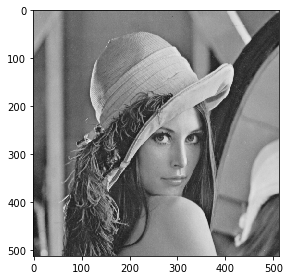

In [8]:
filename='./images/lena-grey.bmp'
lena=io.imread(filename)
lena_im=img_as_float(lena)
io.imshow(lena_im)

/opt/anaconda/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


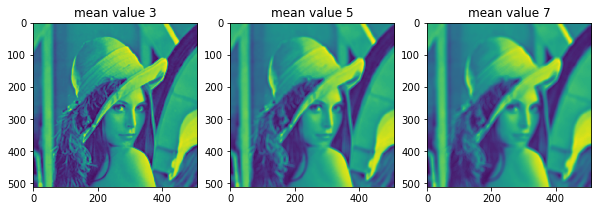

In [9]:
from skimage.morphology import disk
from skimage.filters.rank import mean
avg1=mean(lena_im,disk(3))
avg2=mean(lena_im,disk(5))
avg3=mean(lena_im,disk(7))
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 10))
ax0, ax1, ax2 = axes.ravel()
ax0.imshow(avg1)
ax0.set_title('mean value 3')
ax1.imshow(avg2)
ax1.set_title('mean value 5')
ax2.imshow(avg3)
ax2.set_title('mean value 7')

### 4.1.2 Filtering using convolution 
**Q.2** Once again apply the mean fiter, howver instead of using `filters.rank` make your mean mask having the same size as the last filter you applied in the previous question (disk of 7) and use convolution to apply the filter. 

The function [`ndimage.filters.convolve`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.filters.convolve.html#scipy.ndimage.filters.convolve) from `scipy` allows to compute the convolution between a mask (filter) and an image.

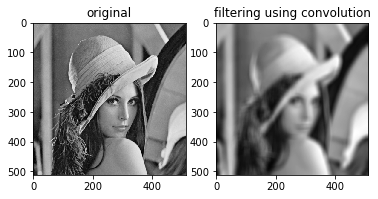

In [10]:
from scipy import ndimage
img=io.imread('./images/lena-grey.bmp')
mask = np.ones((20,20),np.float32)
mask /=np.sum(np.sum(mask))
mean=ndimage.filters.convolve(img,mask)

plt.subplot(121),plt.imshow(img, cmap=cm.gray),plt.title('original')

plt.subplot(122),plt.imshow(mean, cmap=cm.gray),plt.title('filtering using convolution')
plt.show()

Any filtering will work is a similar manner. Only the mask (filter) will change and will define the nature of the filtering.

## 4.2 Common spatial filtering

In this section, you will learn about spatial filters which are commonly used in image processing. These filters are already implemented in `skimage` and can be directly used without applying the previous processing.

check the modules `filters` and `filters.rank` for more information.

In [11]:
from skimage import filters

### 4.2.1 First-order edge detector

You already saw during the lecture the following edge detectors: (i) Roberts, (ii) Prewitt, and (iii) Sobel.
All these operators are an approximation of the first derivative. They are highly sensitive to noise even if Prewitt and Sobel have a smoothing process embedded.

Scharr opearator is an improved version of Sobel such that the operator provides a rotational symmetry.

The following functions are defined in `skimage`: `filters.roberts`, `filters.prewitt`, `filters.sobel`, and `filters.scharr`. 

Q.3 Apply `roberts`, `prewitt`, `sobel` and `scharr` filters on Leaves image (`leaves.jpg`).

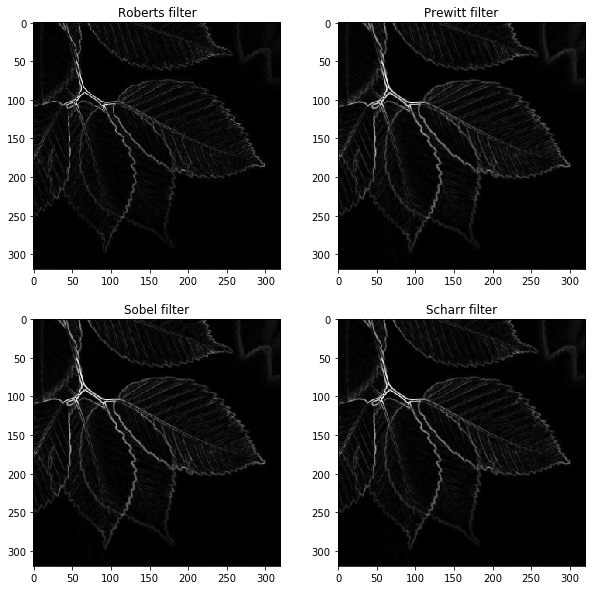

In [12]:
from skimage.color import rgb2gray
filename = './images/leaves.jpg'
leaves_im = io.imread(filename)
leaves_im=rgb2gray(leaves_im) 
leaves_im=img_as_float(leaves_im)

#applying filters
leaves_roberts=filters.roberts(leaves_im)
leaves_prewitt=filters.prewitt(leaves_im)
leaves_sobel=filters.sobel(leaves_im)
leaves_scharr=filters.scharr(leaves_im)

#show the results
fig, axes=plt.subplots(nrows=2,ncols=2,figsize=(10,10))
ax0, ax1, ax2, ax3= axes.ravel()
ax0.imshow(leaves_roberts, cmap = cm.gray)
ax0.set_title('Roberts filter')
ax1.imshow(leaves_prewitt, cmap = cm.gray)
ax1.set_title('Prewitt filter')
ax2.imshow(leaves_sobel, cmap = cm.gray)
ax2.set_title('Sobel filter')
ax3.imshow(leaves_scharr, cmap = cm.gray)
ax3.set_title('Scharr filter')

**Q.4** Implement sobel filters using convolution operation.
Reminder, sobels operators in horizontal and vertical are as follows.

$$S_x = \begin{bmatrix}1& 0 & -1\\ 2 & 0 & -2 \\ 1 & 0 & -1\end{bmatrix}, \qquad S_y = \begin{bmatrix}1& 2 & 1\\ 0 & 0 & 0 \\ -1 & -2 & -1\end{bmatrix}$$

and then show the magnitude and angle image obtained from the filter 

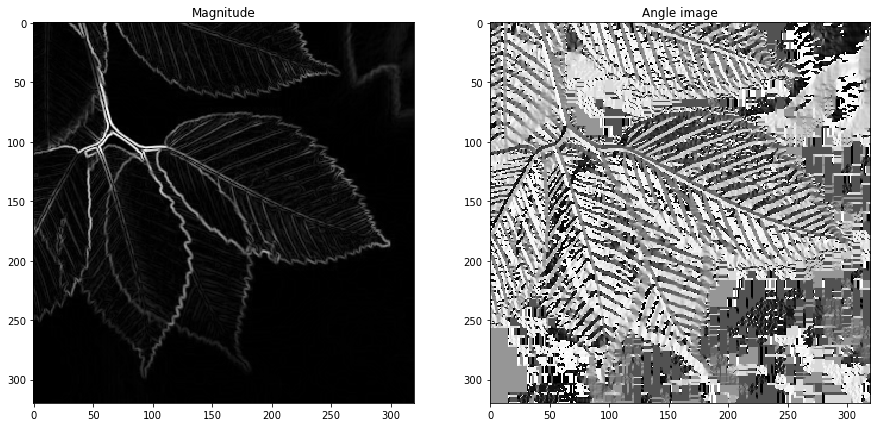

In [13]:
#sobel filter
sx=np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]],np.float)
sy=np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]],np.float)

#using laplace filtre
gx=ndimage.convolve(leaves_im, sx)
gy=ndimage.convolve(leaves_im, sy)

#magnitude
magnitude = np.sqrt(gx*gx + gy*gy)
ang = np.arctan2(gy, gx)

#display the image  
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,15))
ax0, ax1 = axes.ravel()
ax0.imshow(magnitude, cmap = cm.Greys_r)
ax0.set_title('Magnitude')
ax1.imshow(ang, cmap = cm.Greys_r)
ax1.set_title('Angle image')


### 4.2.2 Second-order edge detector (Laplace filter)

The second order edge detector is using the Laplace kernel as seen in lectures.

The `skimage` toolbox does provides an implementation of this filter in `filters.laplace` modules. 

**Q.4** Apply this filter on the Leaves image.

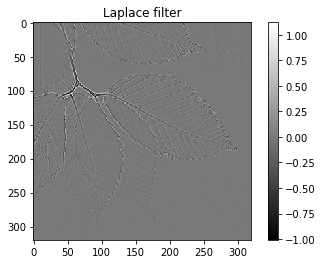

In [14]:
leaves=io.imread("./images/leaves.jpg", as_grey = True)
leaves=img_as_float(leaves)

#Apply Scharr filter

leaves_scharr=filters.laplace(leaves)

#Show the image
#using laplace filter
plt.figure()
plt.imshow(leaves_scharr, cmap=cm.gray)
plt.title('Laplace filter')
plt.colorbar()
plt.show()

### 4.2.3 Angular edge detector (Gabor filter)

In the previous section, edges are detected using the response of two kernels (i.e., horizontal and vertical kernels) which are later combined (i.e., magnitude and angle). 

Gabor filters is a family of filters which are sensitive to a specific angle and a specific frequency.
Gabor filter is defined by a sinusoidal wave multiplied by a guassian, the complex form of this filter is presented bellow :

$$g(x,y;\lambda,\theta,\psi,\sigma,\gamma) = \exp\left(-\frac{x'^2+\gamma^2y'^2}{2\sigma^2}\right)\exp\left(i\left(2\pi\frac{x'}{\lambda}+\psi\right)\right)$$

where 
$$
{\displaystyle x'=x\cos \theta +y\sin \theta \,}$$
and
$$
{\displaystyle y'=-x\sin \theta +y\cos \theta \,} $$
`Skimage` provides an implementation of gabor filtering in [`filters.gabor`](http://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.gabor)


**Q.5 **Apply this filter to find the edges at 60 degrees in Lena image. Try with different frequencies in the range [0.05, 0.5].

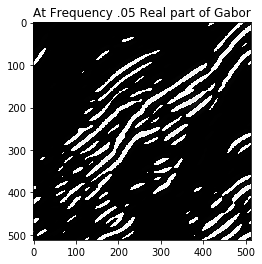

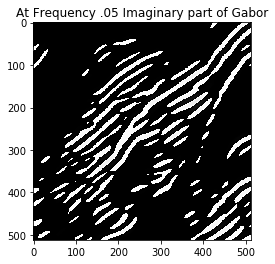

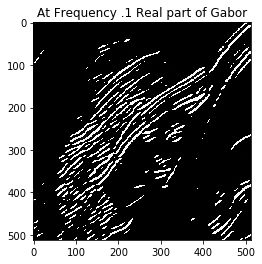

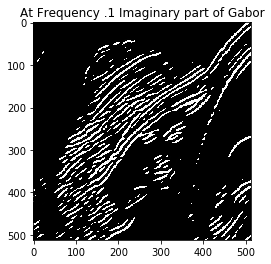

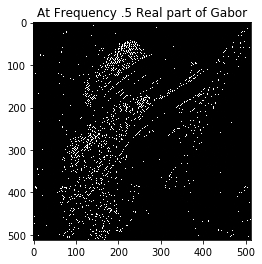

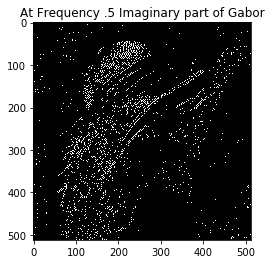

In [15]:
import math
leaves = io.imread('./images/lena-grey.bmp', as_grey= True)
r_gabor, i_gabor = filters.gabor(leaves, frequency= 0.05, theta = math.pi/3)
plt.show()
#frequncy range 0.05
plt.imshow(r_gabor,cmap='gray')
plt.title('At Frequency .05 Real part of Gabor')
plt.show()
plt.imshow(i_gabor,cmap='gray')
plt.title('At Frequency .05 Imaginary part of Gabor')
#frequncy range 1
r_gabor, i_gabor = filters.gabor(leaves, frequency= 0.1, theta = math.pi/3)
plt.show()
plt.imshow(r_gabor,cmap='gray')
plt.title('At Frequency .1 Real part of Gabor')
plt.show()
plt.imshow(i_gabor,cmap='gray')
plt.title('At Frequency .1 Imaginary part of Gabor')
#frequncy range 0.5
r_gabor, i_gabor = filters.gabor(leaves, frequency= 0.5, theta = math.pi/3)
plt.show()
plt.imshow(r_gabor,cmap='gray')
plt.title('At Frequency .5 Real part of Gabor')
plt.show()
plt.imshow(i_gabor,cmap='gray')
plt.title('At Frequency .5 Imaginary part of Gabor')

## 4.3 Denoising filters

Different filters can be applied in the spatial domain to remove the noise.
These filters can be found in the module `filters.rank`.

Before to start denoising the image, we need to generate some corrupted image using the noise generator from `skimage`.
For this purpose, we will use the function [`util.random_noise`](http://scikit-image.org/docs/dev/api/skimage.util.html#skimage.util.random_noise).

**Q.6 ** Generate several corrupted Lena images with `gaussian` noise, `salt & peppers` noise, and `speckle` noise. Keep the default parameters.

In [16]:
from skimage import util

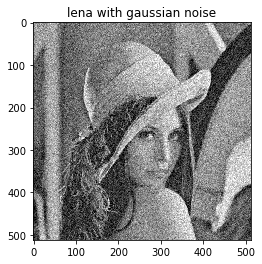

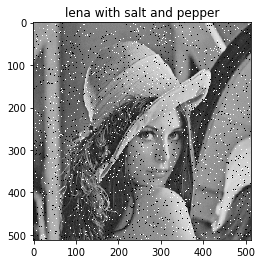

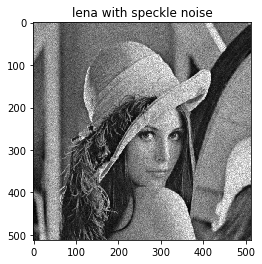

In [17]:
lena=io.imread('images/lena-grey.bmp',as_grey = True)
lena=img_as_float(lena)

#Generate corrupted lena image with gaussian
lena_gaussian= util.random_noise(lena,mode='gaussian')

#Display lena image with gaussian noise 
plt.figure()
plt.imshow(lena_gaussian, cmap = cm.gray)
plt.title('lena with gaussian noise')
plt.show()

#salt and pepper noise
lena_s_p = util.random_noise(lena,mode='s&p')

#Show salt and pepper lena image
plt.figure()
plt.imshow(lena_s_p, cmap = cm.gray)
plt.title('lena with salt and pepper')
plt.show()

#Generate corrupted lena image with speckle noise
lena_speckle = util.random_noise(lena,mode='speckle')

#Show speckle lena image
plt.figure()
plt.imshow(lena_speckle, cmap = cm.gray)
plt.title('lena with speckle noise')
plt.show()

**Q.7** Apply `median`, `mean` and `alpha-trimmed` mean filter on different corrupted Lena images with the mask corresponding to disk 1 and 3.

 `alpha-trimmed` ([`mean_percentile`](http://scikit-image.org/docs/dev/api/skimage.filters.rank.html#skimage.filters.rank.mean_percentile)) mean filter works similar to normal mean filter. However, it considers only the grey values inside a specific range.

** Q.7.1 mean filter: **

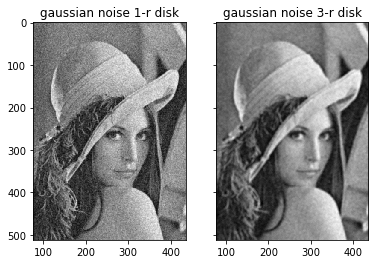

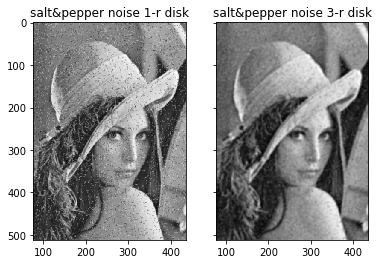

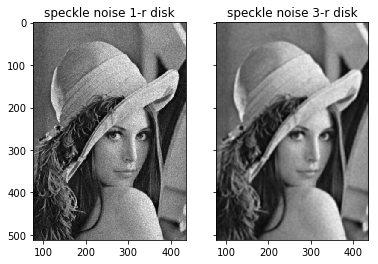

In [18]:
from skimage import morphology, filters

#Store images and names in arrays to iterate
lena_array = [lena_gaussian,lena_s_p,lena_speckle]
lena_names = ['gaussian noise','salt&pepper noise', 'speckle noise']

#Create disks
disk1 = morphology.disk(1)
disk3 = morphology.disk(3)

#For each image in the array
for idx,img in enumerate(lena_array):
    f, (ax1,ax2)=plt.subplots(1,2, sharey = True)
    
#Apply mean filters
    lena_mean1=filters.rank.mean(img,disk1)
    lena_mean3=filters.rank.mean(img,disk3)
    
#plotting the resultant image 
    ax1.imshow(lena_mean1, cmap=cm.gray)
    ax1.set_title(lena_names[idx]+" 1-r disk")
    ax2.imshow(lena_mean3, cmap=cm.gray)
    ax2.set_title(lena_names[idx]+" 3-r disk")

** Q.7.2 alpha-trimmed mean filter: **

Apply this function on the different corrupted Lena by considering the gray value in the range [0.05, 0.95].

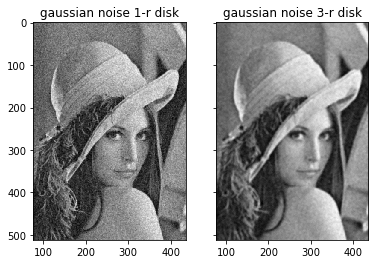

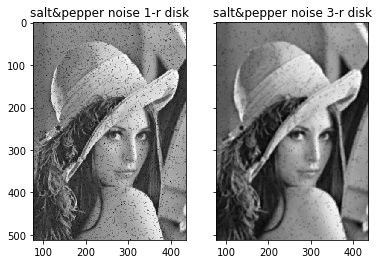

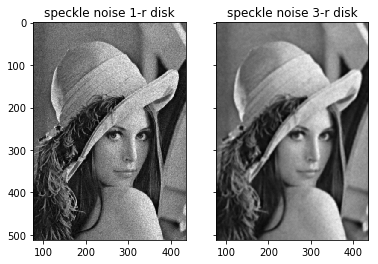

In [19]:
from skimage import morphology, filters

#Store images and names in arrays to iterate
lena_array = [lena_gaussian,lena_s_p,lena_speckle]
lena_names = ['gaussian noise','salt&pepper noise', 'speckle noise']

#Create Disks (masks)
disk1 = morphology.disk(1)
disk3 = morphology.disk(3)

#For each image 
for idx,img in enumerate(lena_array):
    f, (ax1,ax2) = plt.subplots(1,2, sharey=True)
    
    #Apply filter with gray value range
    lena_mean1 = filters.rank.mean_percentile(img,disk1,p0 = 0.05,p1=0.95)
    lena_mean3 = filters.rank.mean_percentile(img,disk3,p0 = 0.05,p1=0.95)
    
#plotting the resultant image 
    ax1.imshow(lena_mean1, cmap = cm.gray)
    ax1.set_title(lena_names[idx]+" 1-r disk")
    ax2.imshow(lena_mean3, cmap = cm.gray)
    ax2.set_title(lena_names[idx]+" 3-r disk")

** Q.7.3 median filter: **

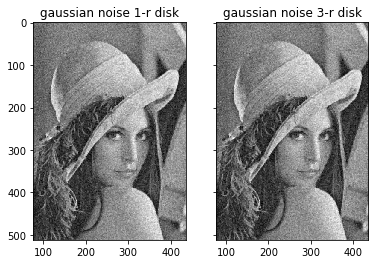

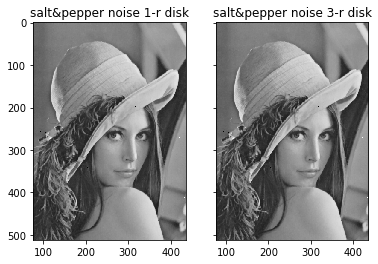

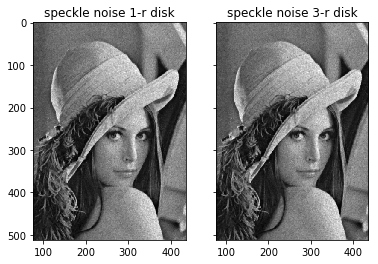

In [20]:
from skimage import morphology, filters

#Store images and names in arrays to iterate
lena_array = [lena_gaussian,lena_s_p,lena_speckle]
lena_names = ['gaussian noise','salt&pepper noise', 'speckle noise']

#Create disks
disk1 = morphology.disk(1)
disk3 = morphology.disk(3)

#For each image
for idx,img in enumerate(lena_array):
    f, (ax1,ax2) = plt.subplots(1,2, sharey=True)
    
    #Apply median filter
    lena_mean1 = filters.rank.median(img,disk1)
    lena_mean3 = filters.rank.median(img,disk1)
    
    #Show results
    ax1.imshow(lena_mean1, cmap = cm.gray)
    ax1.set_title(lena_names[idx]+" 1-r disk")
    ax2.imshow(lena_mean3, cmap = cm.gray)
    ax2.set_title(lena_names[idx]+" 3-r disk")

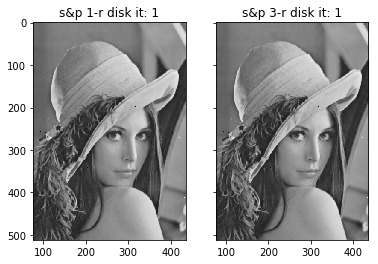

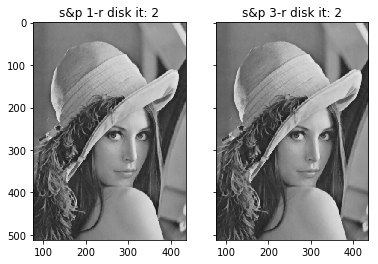

In [21]:
from skimage import morphology, filters
# In this section I tried to Use 2 iterations 
# of mean filter to remove all s&p noise
disk1 = morphology.disk(1)
disk3 = morphology.disk(3)

#Initialize variables with s&p lena image
lena_mean1 = lena_s_p
lena_mean3 = lena_s_p

#Do 2 iterations
for i in range(2):
    f, (ax1,ax2) = plt.subplots(1,2, sharey=True)
    
#Apply filter
    lena_mean1 = filters.rank.median(lena_mean1,disk1)
    lena_mean3 = filters.rank.median(lena_mean3,disk1)
    
#Show results of each iteration
    ax1.imshow(lena_mean1, cmap = cm.gray)
    ax1.set_title("s&p 1-r disk it: "+str(i+1))
    ax2.imshow(lena_mean3, cmap = cm.gray)
    ax2.set_title("s&p 3-r disk it: "+str(i+1))

## 4.4 Sharpening

**Q.8** Use the `railway` image and sharpen the image using laplacian fitering.

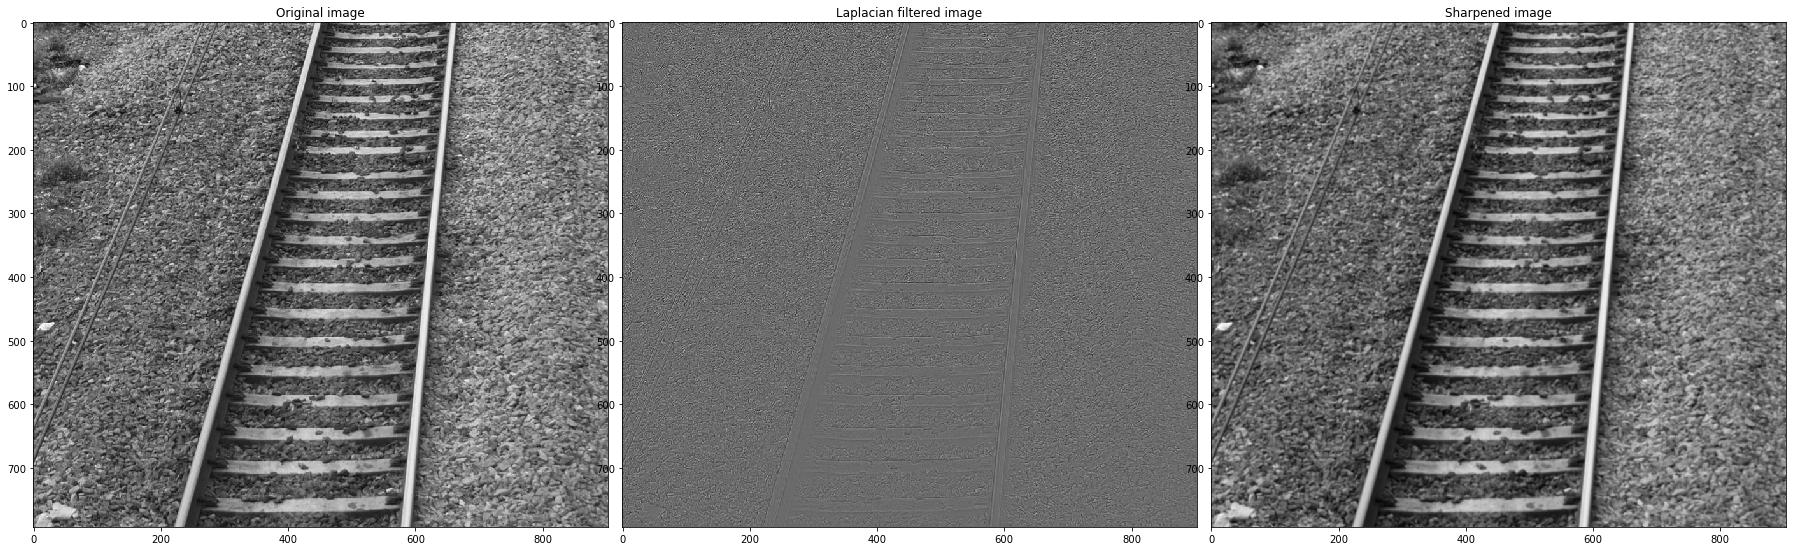

In [22]:
#railway image
file_location = 'images/railway.jpg'
railway_img = io.imread(file_location, as_grey=True)

#Use laplacian filter
railway_laplace = filters.laplace(railway_img)

#create sharpened image
railway_sharpened = railway_img - 0.3*railway_laplace  

#show the images
fig = plt.figure(figsize=(25,25))
plt.subplot (131)
io.imshow(railway_img)
plt.title('Original image')
#show laplacian filtered image
plt.subplot (132)
plt.imshow(railway_laplace, cmap='gray')
plt.title ('Laplacian filtered image')
#show sharpened image
plt.subplot (133)
plt.imshow(railway_sharpened, cmap='gray')
plt.title ('Sharpened image')

## 4.5 Hough transform

** Q.9 ** Define your Hough_trans function which finds the lines within an image

you can use either `hough_line` and `hough_line_peaks` or `probabilistic_hough_line` from [`skimage.transform`](http://scikit-image.org/docs/dev/api/skimage.transform.html). 

search a bit to know the difference between `probablistic_hough_line` and `hough_line`

Or `HoughLines` and `HoughLinesP` from [`cv2`](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_tutorials.html)


Test your function on `railway` and `building` images. 

**Note : use `skimage.feature.canny` or `cv2.canny` edge detector to find the primary edges**

In [23]:
from skimage import feature, transform, draw

def Hough_trans(img,threshold=200,line_gap=40):
    
    #Apply probabilitic hough line transform
    lines = transform.probabilistic_hough_line(edges,threshold = threshold,line_gap=line_gap)
    
    #Create new zero image
    rail_hough = np.zeros((edges.shape[0],edges.shape[1]))

    #For each line
    for l in lines:
        #Draw line in the image as white pixels
        rr, cc = draw.line(l[0][1],l[0][0],l[1][1],l[1][0])
        rail_hough[rr,cc]=1
    
    return rail_hough

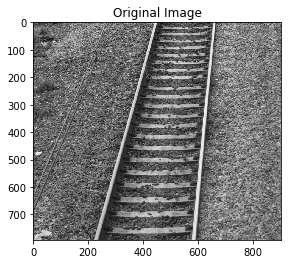

/opt/anaconda/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


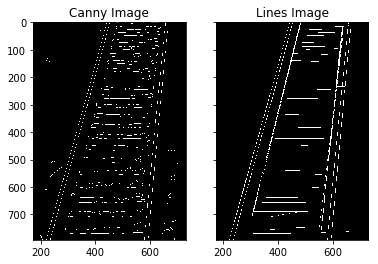

In [24]:
railway = io.imread('images/railway.jpg',as_grey = True)
railway = img_as_float(railway)

plt.figure()
plt.imshow(railway, cmap = cm.gray)
plt.title('Original Image')
plt.show()

#Get primary edges of the images using canny
edges = feature.canny(railway, sigma=4)

#Apply hough function 
rail_hough = Hough_trans(edges,threshold=65)
f, (ax1,ax2) = plt.subplots(1,2, sharey=True)

#Display canny image
ax1.imshow(edges, cmap = cm.gray)
ax1.set_title('Canny Image')

#Display hough image
ax2.imshow(rail_hough, cmap = cm.gray)
ax2.set_title('Lines Image')

f.show()

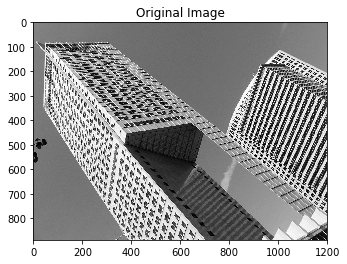

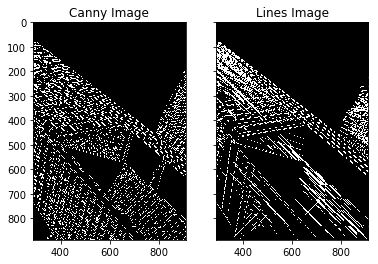

In [25]:
building = io.imread('images/building.jpg',as_grey = True)
building = img_as_float(building)

plt.figure()
plt.imshow(building, cmap = cm.gray)
plt.title('Original Image')
plt.show()
#Get primary edges of the images using canny
edges = feature.canny(building)

#Apply hough function
building_hough = Hough_trans(building,threshold=240,line_gap=10)
f, (ax1,ax2) = plt.subplots(1,2, sharey=True)

#Display canny image
ax1.imshow(edges, cmap = cm.gray)
ax1.set_title('Canny Image')

#Display hough image
ax2.imshow(building_hough, cmap = cm.gray)
ax2.set_title('Lines Image')

f.show()